# 3 Anusha Custom Stats & PCA

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Read in data files

In [3]:
moseq_df_file_path = '/Genomics/argo/users/aa8417/anusha_kpms_trial/anusha_kpms_project/gpu_1e5_all_data/moseq_df.csv'
moseq_df = pd.read_csv(moseq_df_file_path)

stats_df_file_path = '/Genomics/argo/users/aa8417/anusha_kpms_trial/anusha_kpms_project/gpu_1e5_all_data/stats_df.csv'
stats_df = pd.read_csv(stats_df_file_path)

In [4]:
moseq_df

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,Trial2_UlqC1_060_analysis_track0,2813.552432,1086.670623,-0.637191,0.000000,0.000000,19,0,default,True
1,Trial2_UlqC1_060_analysis_track0,2812.863907,1087.132447,-0.600219,0.087998,24.871932,19,1,default,False
2,Trial2_UlqC1_060_analysis_track0,2813.333775,1086.489669,-0.408330,0.143057,23.886096,19,2,default,False
3,Trial2_UlqC1_060_analysis_track0,2812.760486,1086.752119,-0.490255,0.153772,18.915254,19,3,default,False
4,Trial2_UlqC1_060_analysis_track0,2811.781453,1086.526121,-0.563314,0.134628,30.143362,19,4,default,False
...,...,...,...,...,...,...,...,...,...,...
3527995,Trial4_UlqC1_060_analysis_track9,2229.563375,2963.460853,1.082605,0.020916,16.872081,24,71995,default,False
3527996,Trial4_UlqC1_060_analysis_track9,2230.837339,2963.589451,1.088122,0.030455,38.413145,24,71996,default,False
3527997,Trial4_UlqC1_060_analysis_track9,2230.496388,2962.636896,1.080828,0.034083,30.352058,24,71997,default,False
3527998,Trial4_UlqC1_060_analysis_track9,2230.985323,2963.181010,1.096715,0.029608,21.945520,24,71998,default,False


In [5]:
stats_df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,default,Trial2_UlqC1_060_analysis_track0,0,-0.008429,1.707789,-3.137059,3.139218,0.148907,11.560515,-187.917112,188.230607,94.251245,71.720089,0.517417,1976.642454,0.083743,0.219208
1,default,Trial2_UlqC1_060_analysis_track0,1,0.142729,1.897415,-3.139974,3.137366,-0.221078,12.703561,-188.014395,187.534699,108.397981,73.418969,0.605706,441.110550,0.079691,0.145506
2,default,Trial2_UlqC1_060_analysis_track0,2,0.304362,1.790477,-3.133213,3.141183,0.044329,11.490532,-187.590005,187.462314,120.648347,89.161624,0.419368,1008.156427,0.068271,0.127758
3,default,Trial2_UlqC1_060_analysis_track0,3,0.053973,1.889395,-3.140425,3.136445,-0.114765,12.951170,-188.261123,4.661462,91.688484,58.984816,0.936674,387.419209,0.069499,0.198233
4,default,Trial2_UlqC1_060_analysis_track0,4,-0.094562,1.818180,-3.140668,3.140949,-0.004377,6.732633,-188.220655,188.016878,80.146921,53.929470,0.773517,369.366468,0.080305,0.397401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,default,Trial4_UlqC1_060_analysis_track9,25,0.302684,1.534039,-3.091127,2.785993,-0.001829,0.432861,-3.337498,3.472150,30.567050,16.848049,0.861679,120.729481,0.014354,0.958333
1437,default,Trial4_UlqC1_060_analysis_track9,26,0.383951,1.655801,-2.225178,2.015719,0.098795,0.411537,-1.341715,1.199417,55.899668,46.042975,3.320983,241.466897,0.003589,0.213889
1438,default,Trial4_UlqC1_060_analysis_track9,27,0.978366,2.419350,-3.141516,3.141469,0.062308,16.234101,-188.487233,188.481936,24.906468,13.411451,0.503953,96.866982,0.011364,2.719298
1439,default,Trial4_UlqC1_060_analysis_track9,28,0.762874,1.194861,-2.931854,3.077776,0.004094,0.430078,-3.825036,6.842309,30.231792,16.729645,0.547180,116.638160,0.018242,1.203279


### Frequency Plot

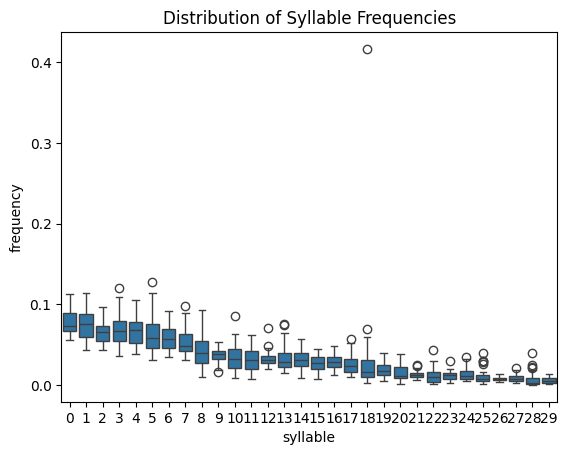

In [6]:
plt.figure()
sns.boxplot(x='syllable', y='frequency', data=stats_df)
plt.title('Distribution of Syllable Frequencies')
plt.show()

### Duration Plot

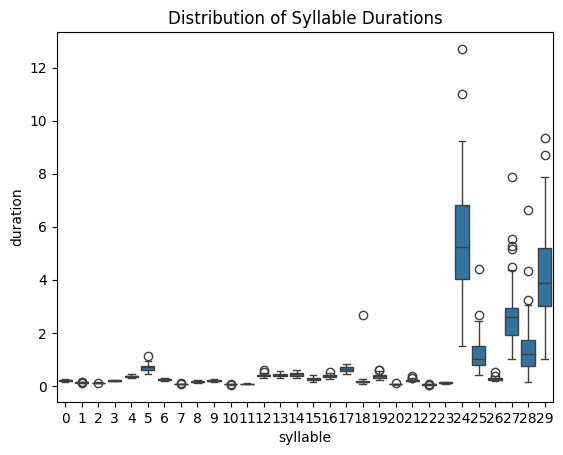

In [7]:
plt.figure()
sns.boxplot(x='syllable', y='duration', data=stats_df)
plt.title('Distribution of Syllable Durations')
plt.show()

### Velocity Plots

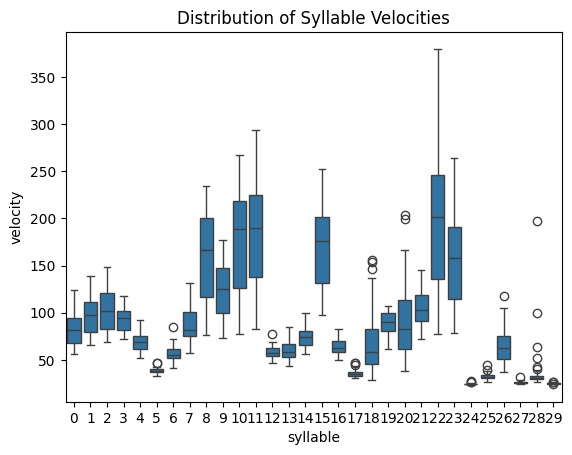

In [8]:
plt.figure()
sns.boxplot(x='syllable', y='velocity_px_s_mean', data=stats_df)
plt.title('Distribution of Syllable Velocities')
plt.ylabel('velocity')
plt.show()

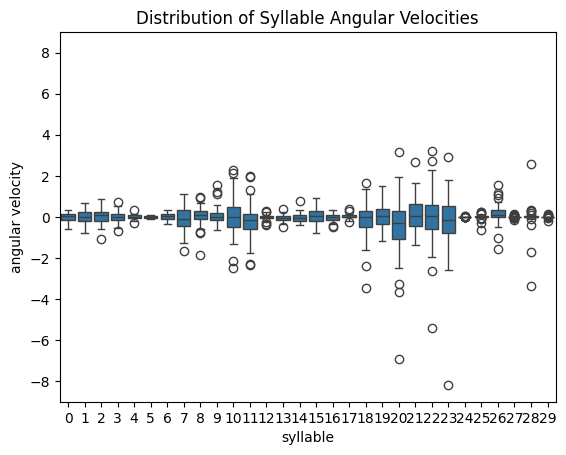

In [9]:
plt.figure()
sns.boxplot(x='syllable', y='angular_velocity_mean', data=stats_df)
plt.title('Distribution of Syllable Angular Velocities')
plt.ylabel('angular velocity')
plt.ylim([-9,9])
plt.show()

### Principal Component Analysis

In [10]:
columns_to_drop = ['name', 'group', 'syllable']
stats_df_for_pca = stats_df.drop(columns=columns_to_drop)

stats_df_syllables = stats_df['syllable']

stats_df_for_pca

,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,-0.008429,1.707789,-3.137059,3.139218,0.148907,11.560515,-187.917112,188.230607,94.251245,71.720089,0.517417,1976.642454,0.083743,0.219208
1,0.142729,1.897415,-3.139974,3.137366,-0.221078,12.703561,-188.014395,187.534699,108.397981,73.418969,0.605706,441.110550,0.079691,0.145506
2,0.304362,1.790477,-3.133213,3.141183,0.044329,11.490532,-187.590005,187.462314,120.648347,89.161624,0.419368,1008.156427,0.068271,0.127758
3,0.053973,1.889395,-3.140425,3.136445,-0.114765,12.951170,-188.261123,4.661462,91.688484,58.984816,0.936674,387.419209,0.069499,0.198233
4,-0.094562,1.818180,-3.140668,3.140949,-0.004377,6.732633,-188.220655,188.016878,80.146921,53.929470,0.773517,369.366468,0.080305,0.397401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,0.302684,1.534039,-3.091127,2.785993,-0.001829,0.432861,-3.337498,3.472150,30.567050,16.848049,0.861679,120.729481,0.014354,0.958333
1437,0.383951,1.655801,-2.225178,2.015719,0.098795,0.411537,-1.341715,1.199417,55.899668,46.042975,3.320983,241.466897,0.003589,0.213889
1438,0.978366,2.419350,-3.141516,3.141469,0.062308,16.234101,-188.487233,188.481936,24.906468,13.411451,0.503953,96.866982,0.011364,2.719298
1439,0.762874,1.194861,-2.931854,3.077776,0.004094,0.430078,-3.825036,6.842309,30.231792,16.729645,0.547180,116.638160,0.018242,1.203279


In [11]:
stats_df_for_pca = stats_df_for_pca.dropna()

stats_df_for_pca

,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,-0.008429,1.707789,-3.137059,3.139218,0.148907,11.560515,-187.917112,188.230607,94.251245,71.720089,0.517417,1976.642454,0.083743,0.219208
1,0.142729,1.897415,-3.139974,3.137366,-0.221078,12.703561,-188.014395,187.534699,108.397981,73.418969,0.605706,441.110550,0.079691,0.145506
2,0.304362,1.790477,-3.133213,3.141183,0.044329,11.490532,-187.590005,187.462314,120.648347,89.161624,0.419368,1008.156427,0.068271,0.127758
3,0.053973,1.889395,-3.140425,3.136445,-0.114765,12.951170,-188.261123,4.661462,91.688484,58.984816,0.936674,387.419209,0.069499,0.198233
4,-0.094562,1.818180,-3.140668,3.140949,-0.004377,6.732633,-188.220655,188.016878,80.146921,53.929470,0.773517,369.366468,0.080305,0.397401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,0.302684,1.534039,-3.091127,2.785993,-0.001829,0.432861,-3.337498,3.472150,30.567050,16.848049,0.861679,120.729481,0.014354,0.958333
1437,0.383951,1.655801,-2.225178,2.015719,0.098795,0.411537,-1.341715,1.199417,55.899668,46.042975,3.320983,241.466897,0.003589,0.213889
1438,0.978366,2.419350,-3.141516,3.141469,0.062308,16.234101,-188.487233,188.481936,24.906468,13.411451,0.503953,96.866982,0.011364,2.719298
1439,0.762874,1.194861,-2.931854,3.077776,0.004094,0.430078,-3.825036,6.842309,30.231792,16.729645,0.547180,116.638160,0.018242,1.203279


In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stats_df_for_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_stats_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [13]:
cumulative_explained_variance

array([0.29491986, 0.44386847])

In [14]:
explained_variance_ratio

array([0.29491986, 0.14894862])

In [15]:
pca_stats_df['syllable'] = stats_df_syllables
pca_stats_df

,PC1,PC2,syllable
0,-1.438808,-0.802913,0
1,-1.726338,-0.902937,1
2,-1.687521,-0.380881,2
3,-0.765914,-0.547439,3
4,-0.926314,-1.404039,4
...,...,...,...
1436,2.624280,-0.168256,25
1437,3.454435,1.886877,26
1438,-0.492086,-1.638246,27
1439,2.896191,-0.143809,28


Code to cut dendrogram and make new & fewer syllable groupings.

In [16]:
# model gpu_1e5_all_data cut dendrogram
syllable_mapping = {
    19: 1,
    16: 2, 26: 2, 1: 2, 4: 2, 28: 2, 27: 2, 24: 2, 29: 2, 12: 2, 7: 2, 13: 2, 0: 2, 2: 2, 18: 2, 6: 2, 17: 2, 5: 2, 25: 2, 20: 2, 14: 2, 9: 2, 23: 2,
    3: 3, 21: 3,
    22: 4, 11: 4, 10: 4, 8: 4, 15: 4
}

pca_stats_df['cut'] = pca_stats_df['syllable'].map(syllable_mapping)

In [ ]:
# model gpu_1e5_new_data cut dendrogram
syllable_mapping = {
    22: 1, 29 : 1,
    26: 2, 27: 2, 9: 2, 14: 2, 17: 2,
    13: 3, 19: 3, 28: 3, 3: 3, 12: 3, 1: 3, 2: 3, 0: 3, 6: 3, 10: 3, 25: 3, 21: 3, 27: 3, 23: 3, 5: 3, 15: 3, 16: 3, 8: 3, 18: 3,
    20: 4,
    24: 5, 4: 5, 11: 5
}

pca_stats_df['cut'] = pca_stats_df['syllable'].map(syllable_mapping)

In [17]:
pca_stats_df

,PC1,PC2,syllable,cut
0,-1.438808,-0.802913,0,2
1,-1.726338,-0.902937,1,2
2,-1.687521,-0.380881,2,2
3,-0.765914,-0.547439,3,3
4,-0.926314,-1.404039,4,2
...,...,...,...,...
1436,2.624280,-0.168256,25,2
1437,3.454435,1.886877,26,2
1438,-0.492086,-1.638246,27,2
1439,2.896191,-0.143809,28,2


Generate PCA plot colored by syllable grouping. 

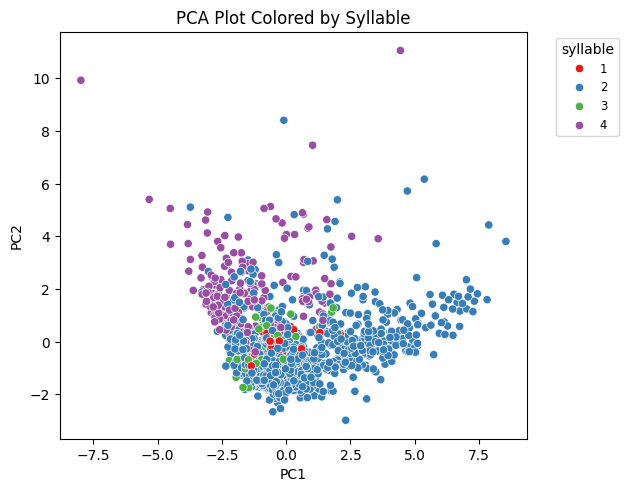

In [18]:
# Plot the scatterplot
sns.scatterplot(x='PC1', y='PC2', hue='cut', data=pca_stats_df, palette='Set1')

# Customize the legend
legend = plt.legend(title='syllable', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add title and show the plot
plt.tight_layout()
plt.title('PCA Plot Colored by Syllable')
plt.show()